# COFFEE SHOP SALES ANALYSIS

## Project Overview

#### This comprehensive analytics project focuses on a coffee shop's sales data spanning March 1 to July 31, 2024, containing 1,447 transactions with detailed customer purchase information. The dataset includes timestamps, payment methods, product details, pricing, and anonymized customer identifiers, providing a rich foundation for time series analysis, customer behavior insights, and sales forecasting.

## Dataset Overview
* Time period: March 1, 2024 - July 31, 2024 (5 months)
* Total transactions: 1133 records
* Payment methods: Card and cash
* Products: Various coffee drinks and beverages

## Primary Goals
### Time Series Analysis
1. Identify daily, weekly, and monthly sales patterns
2. Detect seasonal trends and peak business hours
3. Analyze revenue fluctuations and growth trajectories

### Sales Forecasting
1. Develop predictive models for next-day sales
2. Project weekly and monthly revenue expectations
3. Identify factors influencing sales variability

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [83]:
df = pd.read_csv("C:\\Users\\cw\\OneDrive\\Desktop\\Unified\\index.csv")

In [84]:
df.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Initial data inspection

In [86]:
print(f"Data Set Overview")
print(f"Dataset Shape : {df.shape}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Transaction: {len(df)}")
print(f"Total Revenue: {df['money'].sum():,.2f}")

Data Set Overview
Dataset Shape : (1133, 6)
Date Range: 2024-03-01 to 2024-07-31
Total Transaction: 1133
Total Revenue: 37,508.88


## Data Cleaning & Preprocessing

In [88]:
print(df.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [89]:
df['card'].fillna('cash_payment', inplace=True)

#convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

#Extract hrs from datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()
df['week_number'] = df['datetime'].dt.isocalendar().week

#Check for duplicates
print(f"Duplicate Transaction: {df.duplicated().sum()}")
print(f"Zero/negative_amounts: {(df['money'] <= 0).sum()}")
print(f"Invalid dates: {df['date'].isnull().sum()}")
print(df['coffee_name'].value_counts())


Duplicate Transaction: 0
Zero/negative_amounts: 0
Invalid dates: 0
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: coffee_name, dtype: int64


# 1. Time Series Exploratory Data Analysis

### 1.1 Daily Sales Patterns

In [92]:
daily_revenue = df.groupby('date')['money'].sum()
daily_transaction = df.groupby('date')['money'].count()

print(f"Average daily revenue: {daily_revenue.mean():.2f}")
print(f"Average daily transaction: {daily_transaction.mean():.2f}")
print(f"Revenue per transaction: {df['money'].mean():.2f}")

Average daily revenue: 250.06
Average daily transaction: 7.55
Revenue per transaction: 33.11


### 1.2 Weekly Sales Rhythm

In [94]:
weekly_pattern = df.groupby('day_of_week')['money'].sum()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pattern = weekly_pattern.reindex(days_order)

for day in days_order:
    revenue = weekly_pattern[day]
    percentage = (revenue/weekly_pattern.sum() * 100)
    print(f"{day}: ₹{revenue:,.0f} ({percentage:.1f}%)")

Monday: ₹4,970 (13.2%)
Tuesday: ₹6,092 (16.2%)
Wednesday: ₹5,327 (14.2%)
Thursday: ₹5,467 (14.6%)
Friday: ₹5,386 (14.4%)
Saturday: ₹5,216 (13.9%)
Sunday: ₹5,050 (13.5%)


### 1.3 Monthly Revenue Trends

In [96]:
monthly_revenue = df.groupby('month')['money'].sum()
months_order = ['March', 'April', 'May', 'June', 'July']
monthly_revenue = monthly_revenue.reindex(months_order)

print(f"Monthly Revenue Trends")
for i, month in enumerate(months_order):
    revenue = monthly_revenue[month]
    if i>0:
        prev_revenue = monthly_revenue[months_order[i-1]]
        growth_pct = ((revenue / prev_revenue) - 1) * 100
        print(f"{month}: ₹{revenue:,.0f} ({growth_pct:+.1f}%)")
    else:
        print(f"{month}: ₹{revenue:,.0f}")

Monthly Revenue Trends
March: ₹7,050
April: ₹6,721 (-4.7%)
May: ₹9,063 (+34.9%)
June: ₹7,759 (-14.4%)
July: ₹6,916 (-10.9%)


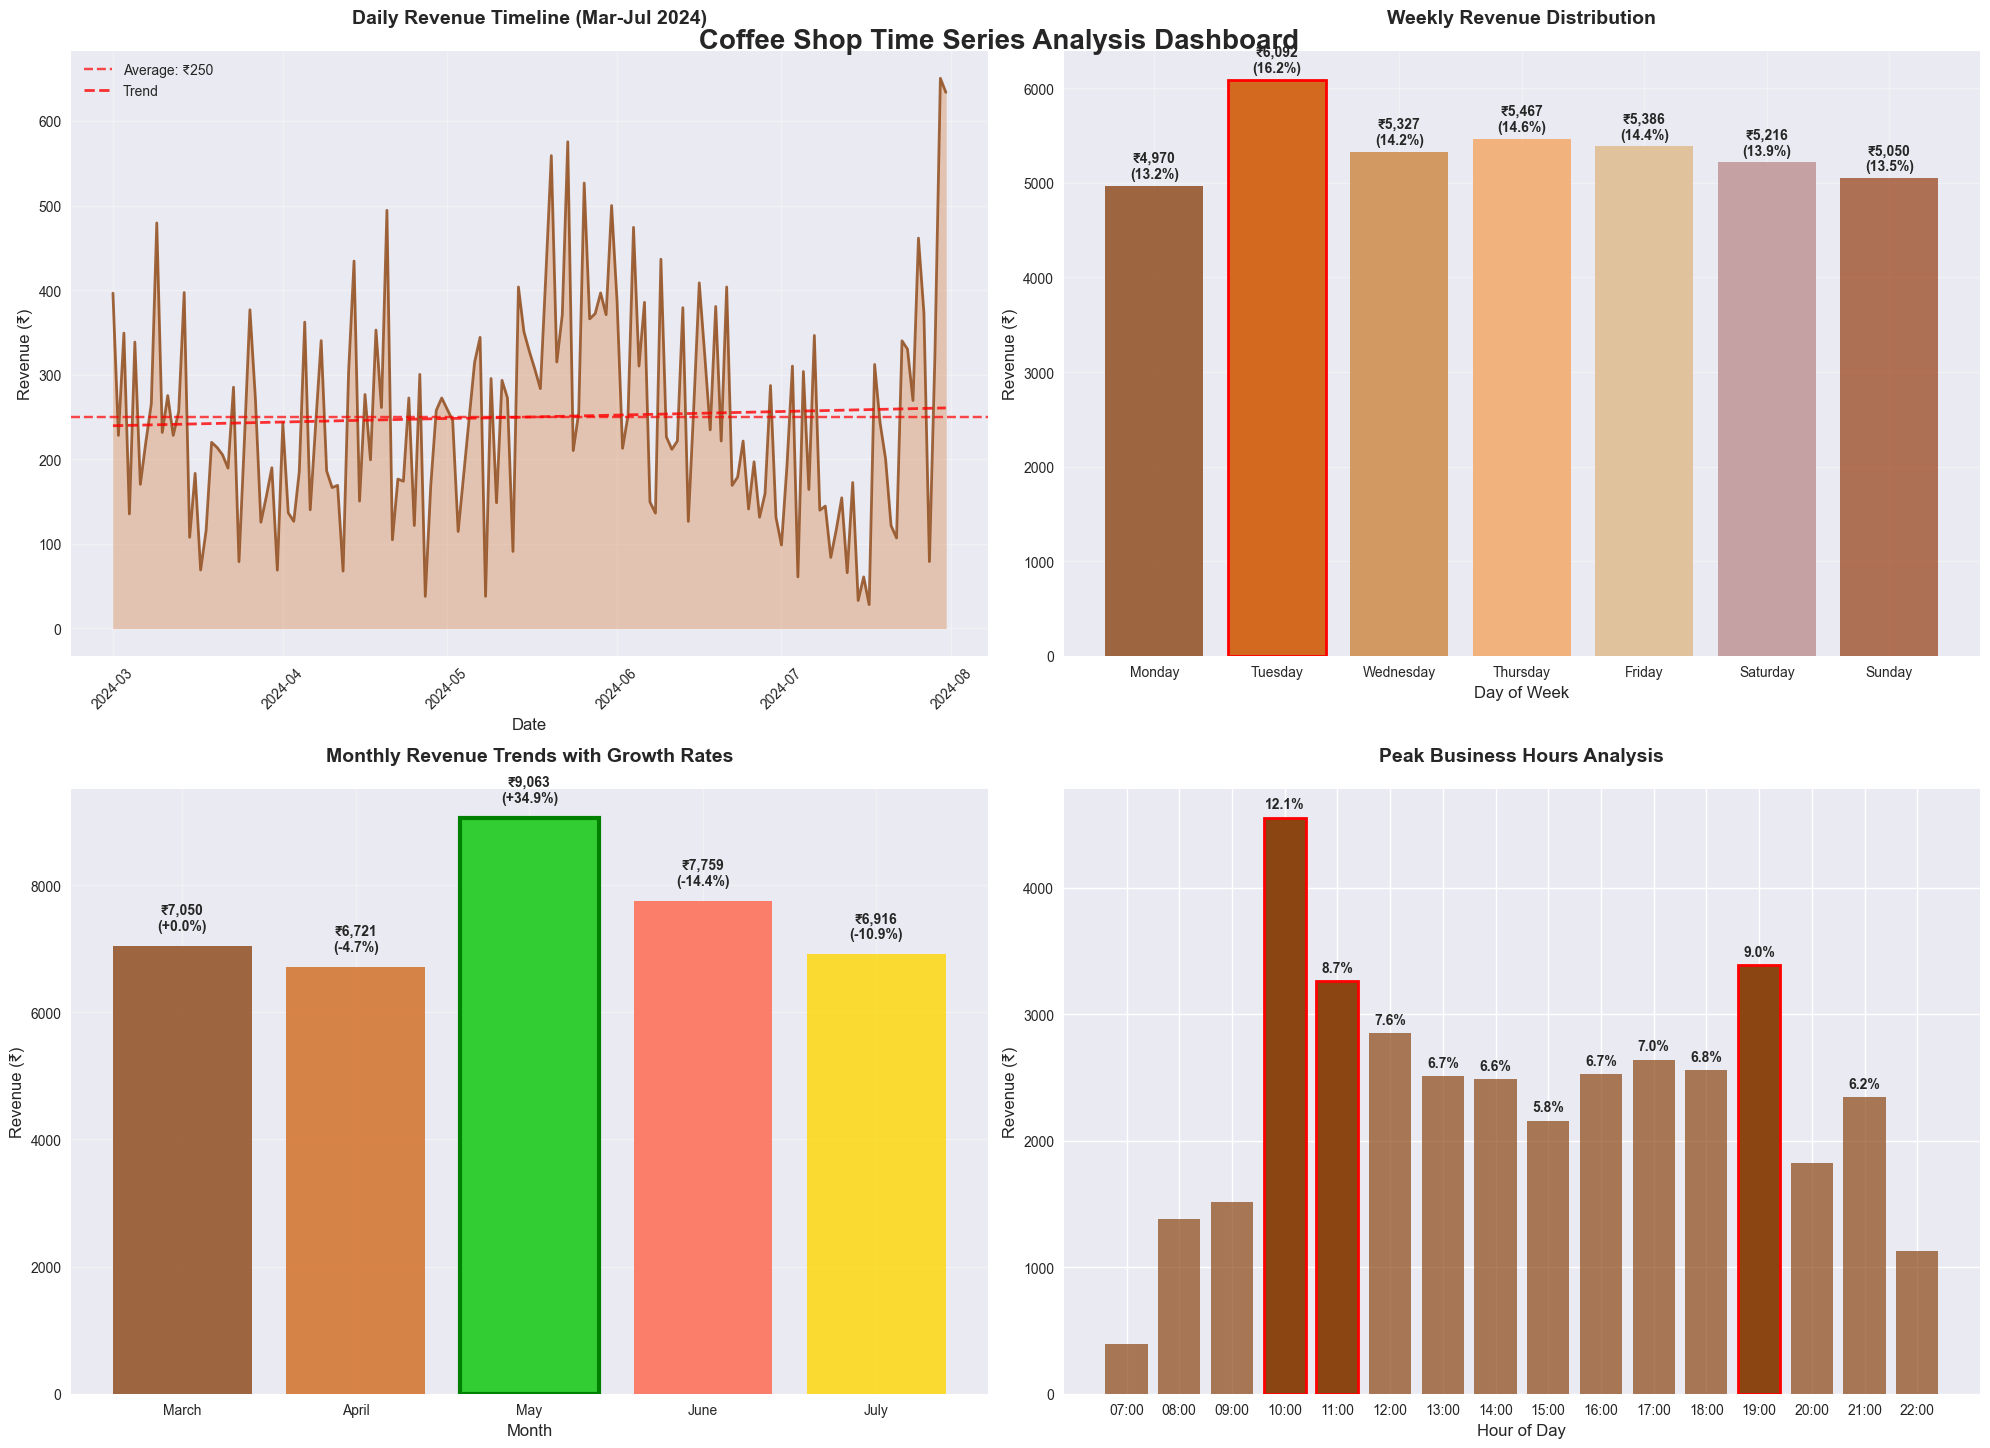

In [97]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle(' Coffee Shop Time Series Analysis Dashboard', fontsize=20, fontweight='bold', y=0.95)

# Data preparation for visualizations
daily_revenue = df.groupby('date')['money'].sum()
daily_transactions = df.groupby('date')['money'].count()
weekly_revenue = df.groupby('day_of_week')['money'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
monthly_revenue = df.groupby('month')['money'].sum().reindex(['March', 'April', 'May', 'June', 'July'])
hourly_revenue = df.groupby('hour')['money'].sum()

# Color palette
colors = ['#8B4513', '#D2691E', '#CD853F', '#F4A460', '#DEB887', '#BC8F8F', '#A0522D']

# 1. DAILY REVENUE TIMELINE
axes[0,0].plot(daily_revenue.index, daily_revenue.values, color='#8B4513', linewidth=2, alpha=0.8)
axes[0,0].fill_between(daily_revenue.index, daily_revenue.values, alpha=0.3, color='#D2691E')
axes[0,0].axhline(y=daily_revenue.mean(), color='red', linestyle='--', alpha=0.7, label=f'Average: ₹{daily_revenue.mean():.0f}')

# Add trend line
z = np.polyfit(range(len(daily_revenue)), daily_revenue.values, 1)
p = np.poly1d(z)
axes[0,0].plot(daily_revenue.index, p(range(len(daily_revenue))), "r--", alpha=0.8, linewidth=2, label='Trend')

axes[0,0].set_title('Daily Revenue Timeline (Mar-Jul 2024)', fontsize=14, fontweight='bold', pad=20)
axes[0,0].set_ylabel('Revenue (₹)', fontsize=12)
axes[0,0].set_xlabel('Date', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. WEEKLY REVENUE PATTERN
bars = axes[0,1].bar(weekly_revenue.index, weekly_revenue.values, color=colors, alpha=0.8)
axes[0,1].set_title('Weekly Revenue Distribution', fontsize=14, fontweight='bold', pad=20)
axes[0,1].set_ylabel('Revenue (₹)', fontsize=12)
axes[0,1].set_xlabel('Day of Week', fontsize=12)

# Add value labels on bars
for bar, value in zip(bars, weekly_revenue.values):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 50,
                  f'₹{value:,.0f}\n({value/weekly_revenue.sum()*100:.1f}%)',
                  ha='center', va='bottom', fontweight='bold')

# Highlight Tuesday as peak day
axes[0,1].patches[1].set_alpha(1.0)
axes[0,1].patches[1].set_edgecolor('red')
axes[0,1].patches[1].set_linewidth(2)

axes[0,1].grid(True, alpha=0.3)

# 3. MONTHLY REVENUE TRENDS
months = monthly_revenue.index
revenues = monthly_revenue.values

# Calculate growth percentages
growth_pct = []
for i in range(len(months)):
    if i == 0:
        growth_pct.append(0)
    else:
        growth = ((revenues[i] / revenues[i-1]) - 1) * 100
        growth_pct.append(growth)

bars = axes[1,0].bar(months, revenues, color=['#8B4513', '#D2691E', '#32CD32', '#FF6347', '#FFD700'], alpha=0.8)
axes[1,0].set_title('Monthly Revenue Trends with Growth Rates', fontsize=14, fontweight='bold', pad=20)
axes[1,0].set_ylabel('Revenue (₹)', fontsize=12)
axes[1,0].set_xlabel('Month', fontsize=12)

# Add value and growth labels
for i, (bar, revenue, growth) in enumerate(zip(bars, revenues, growth_pct)):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 200,
                  f'₹{revenue:,.0f}\n({growth:+.1f}%)',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

# Highlight May as peak month
axes[1,0].patches[2].set_alpha(1.0)
axes[1,0].patches[2].set_edgecolor('green')
axes[1,0].patches[2].set_linewidth(3)

axes[1,0].grid(True, alpha=0.3)

# 4. HOURLY REVENUE DISTRIBUTION
hours = [f"{h:02d}:00" for h in hourly_revenue.index]
bars = axes[1,1].bar(hours, hourly_revenue.values, color='#8B4513', alpha=0.7)
axes[1,1].set_title('Peak Business Hours Analysis', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_ylabel('Revenue (₹)', fontsize=12)
axes[1,1].set_xlabel('Hour of Day', fontsize=12)

# Add percentage labels for top hours
total_hourly = hourly_revenue.sum()
for i, (bar, revenue) in enumerate(zip(bars, hourly_revenue.values)):
    if revenue > total_hourly * 0.05:  # Only label significant hours
        percentage = (revenue / total_hourly) * 100
        axes[1,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50,
                      f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# Highlight peak hours
peak_hours = hourly_revenue.nlargest(3).index.tolist()

# Map hour values → bar index positions
hour_list = list(hourly_revenue.index)
bars = axes[1,1].patches

for h in peak_hours:
    pos = hour_list.index(h)   # find bar index corresponding to this hour
    bar = bars[pos]
    bar.set_alpha(1.0)
    bar.set_edgecolor('red')
    bar.set_linewidth(2)

plt.tight_layout()
#plt.savefig("CP1.jpg", dpi=300, bbox_inches='tight')
plt.show()

## 2. Product Performance & Shopping Trends

### 2.1 Detailed Product Analysis

In [100]:
# poduct performance
product_stats = df.groupby('coffee_name').agg({
    'money': ['count','sum','mean','std'],
    'hour' : ['mean','std']
}).round(2)

product_stats.columns = ['transactions', 'total_revenue', 'avg_price', 'price_std', 'peak_hour', 'hour_variability']
product_stats['market_share'] = (product_stats['total_revenue']/ product_stats['total_revenue'].sum() * 100).round(1)
product_stats['revenue_per_transaction'] =(product_stats['total_revenue'] / product_stats['transactions']).round(2)

print(product_stats.sort_values('market_share', ascending=False))

                     transactions  total_revenue  avg_price  price_std  \
coffee_name                                                              
Latte                         243        9009.14      37.07       2.31   
Americano with Milk           268        8601.94      32.10       2.19   
Cappuccino                    196        7333.14      37.41       1.90   
Americano                     169        4644.54      27.48       2.15   
Hot Chocolate                  74        2778.48      37.55       2.09   
Cortado                        99        2745.08      27.73       2.00   
Cocoa                          35        1295.94      37.03       2.39   
Espresso                       49        1100.62      22.46       2.30   

                     peak_hour  hour_variability  market_share  \
coffee_name                                                      
Latte                    14.32              4.27          24.0   
Americano with Milk      14.49              4.19          22.

### 2.2 Product Trends Over Time

In [102]:
# Monthly product trends
monthly_products = pd.crosstab(df['date'].dt.month_name(), df['coffee_name'], 
                              values=df['money'], aggfunc='count', normalize='index') * 100


print(monthly_products.round(1).reindex(months_order))

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
date                                                                      
March             17.5                 16.5         9.7    2.9     14.6   
April             17.9                 21.4        21.9    3.1      9.7   
May               18.0                 21.7        20.6    3.4      6.4   
June               6.2                 30.4        20.3    2.2      8.4   
July              15.2                 27.4        13.5    3.8      5.9   

coffee_name  Espresso  Hot Chocolate  Latte  
date                                         
March             4.9           10.7   23.3  
April             3.6            6.6   15.8  
May               3.0            5.2   21.7  
June              4.4            6.2   22.0  
July              5.9            4.6   23.6  


### 2.3 Time-Based Product Preferences

In [104]:
# Product preferences by time of day
df['time_period'] = pd.cut(df['hour'], 
                          bins=[0, 12, 17, 24], 
                          labels=['Morning', 'Afternoon', 'Evening'])

time_products = pd.crosstab(df['time_period'], df['coffee_name'], 
                           values=df['money'], aggfunc='count', normalize='index') * 100


print(time_products.round(1))

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
time_period                                                               
Morning           18.1                 25.3        13.0    2.3      9.3   
Afternoon         17.7                 21.4        16.4    3.5     10.5   
Evening            7.6                 23.9        23.9    3.6      6.1   

coffee_name  Espresso  Hot Chocolate  Latte  
time_period                                  
Morning           4.0            4.2   23.7  
Afternoon         5.6            6.2   18.8  
Evening           3.3           10.0   21.5  


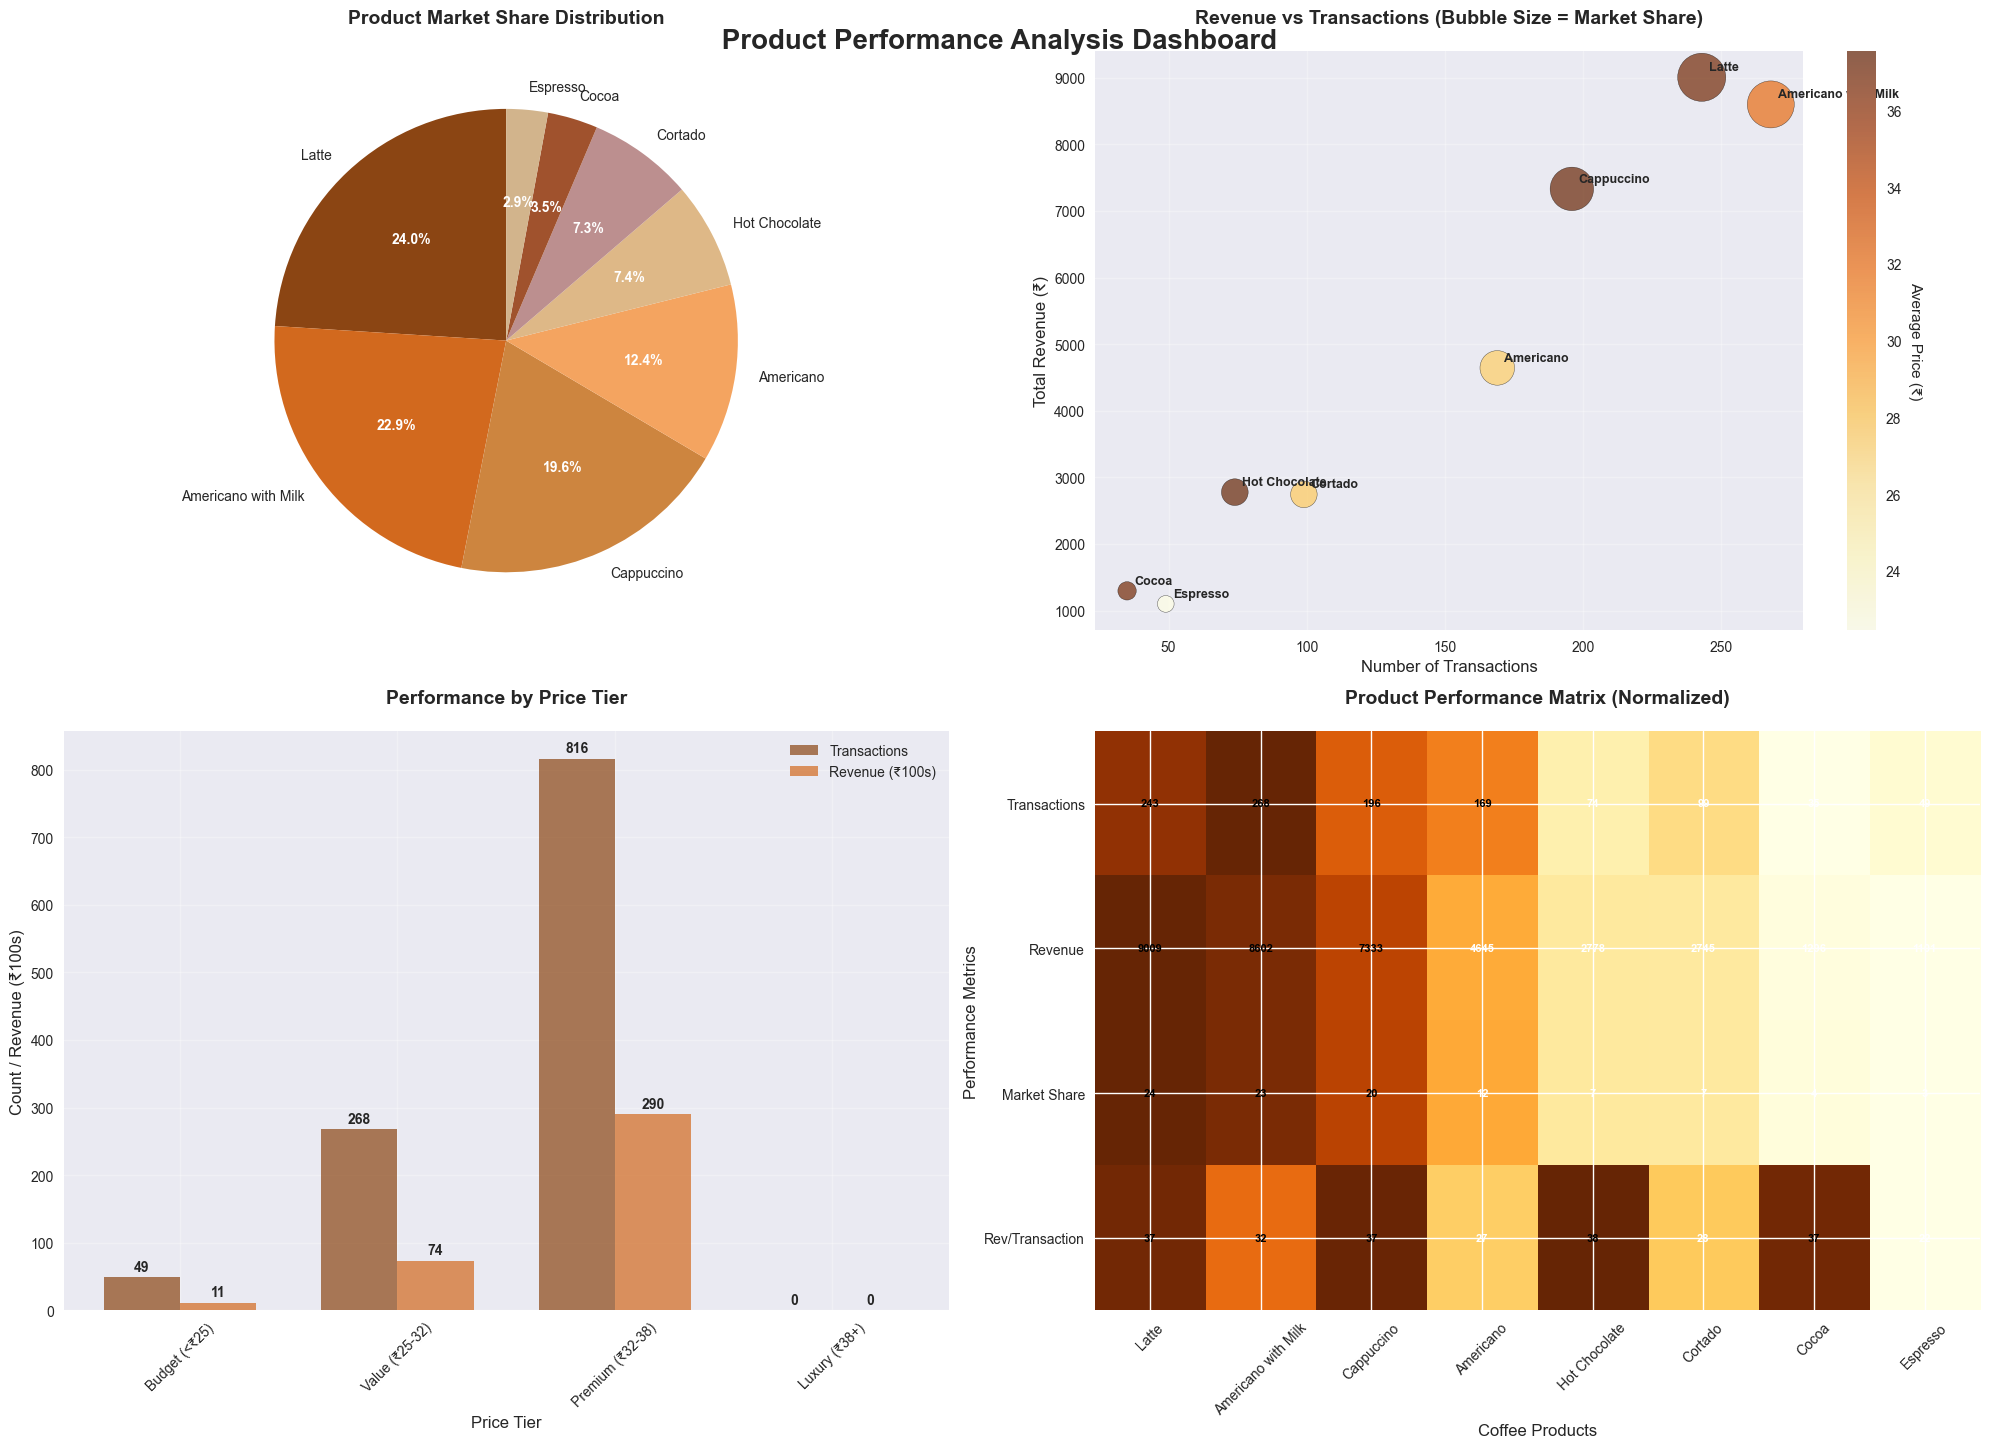

In [105]:
# PRODUCT PERFORMANCE VISUALIZATIONS
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle(' Product Performance Analysis Dashboard', fontsize=20, fontweight='bold', y=0.95)

# Product performance data
product_data = {
    'coffee_name': ['Latte', 'Americano with Milk', 'Cappuccino', 'Americano', 
                   'Hot Chocolate', 'Cortado', 'Cocoa', 'Espresso'],
    'transactions': [243, 268, 196, 169, 74, 99, 35, 49],
    'total_revenue': [9009.14, 8601.94, 7333.14, 4644.54, 2778.48, 2745.08, 1295.94, 1100.62],
    'avg_price': [37.07, 32.10, 37.41, 27.48, 37.55, 27.73, 37.03, 22.46],
    'market_share': [24.0, 22.9, 19.6, 12.4, 7.4, 7.3, 3.5, 2.9]
}

product_df = pd.DataFrame(product_data)

# 1. MARKET SHARE ANALYSIS
colors = ['#8B4513', '#D2691E', '#CD853F', '#F4A460', '#DEB887', '#BC8F8F', '#A0522D', '#D2B48C']
wedges, texts, autotexts = axes[0,0].pie(product_df['market_share'], labels=product_df['coffee_name'], 
                                       autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Product Market Share Distribution', fontsize=14, fontweight='bold', pad=20)

# Enhance pie chart labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 2. REVENUE VS TRANSACTIONS SCATTER PLOT
scatter = axes[0,1].scatter(product_df['transactions'], product_df['total_revenue'], 
                           s=product_df['market_share']*50, c=product_df['avg_price'], 
                           cmap='YlOrBr', alpha=0.7, edgecolors='black')

# Add product labels
for i, row in product_df.iterrows():
    axes[0,1].annotate(row['coffee_name'], 
                      (row['transactions'], row['total_revenue']),
                      xytext=(5, 5), textcoords='offset points',
                      fontsize=9, fontweight='bold')

axes[0,1].set_title('Revenue vs Transactions (Bubble Size = Market Share)', fontsize=14, fontweight='bold', pad=20)
axes[0,1].set_xlabel('Number of Transactions', fontsize=12)
axes[0,1].set_ylabel('Total Revenue (₹)', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# Add colorbar for average price
cbar = plt.colorbar(scatter, ax=axes[0,1])
cbar.set_label('Average Price (₹)', rotation=270, labelpad=15)

# 3. PRICE TIER ANALYSIS
price_tiers = product_df.copy()
price_tiers['price_tier'] = pd.cut(price_tiers['avg_price'], 
                                  bins=[0, 25, 32, 38, 40],
                                  labels=['Budget (<₹25)', 'Value (₹25-32)', 'Premium (₹32-38)', 'Luxury (₹38+)'])

tier_performance = price_tiers.groupby('price_tier').agg({
    'transactions': 'sum',
    'total_revenue': 'sum',
    'coffee_name': 'count'
}).rename(columns={'coffee_name': 'product_count'})

# Create subplot for price tiers
x = np.arange(len(tier_performance))
width = 0.35

bars1 = axes[1,0].bar(x - width/2, tier_performance['transactions'], width, label='Transactions', alpha=0.7, color='#8B4513')
bars2 = axes[1,0].bar(x + width/2, tier_performance['total_revenue']/100, width, label='Revenue (₹100s)', alpha=0.7, color='#D2691E')

axes[1,0].set_title('Performance by Price Tier', fontsize=14, fontweight='bold', pad=20)
axes[1,0].set_xlabel('Price Tier', fontsize=12)
axes[1,0].set_ylabel('Count / Revenue (₹100s)', fontsize=12)
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(tier_performance.index, rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 5,
                      f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

# 4. PRODUCT PERFORMANCE MATRIX
performance_matrix = product_df[['coffee_name', 'transactions', 'total_revenue', 'avg_price', 'market_share']].copy()
performance_matrix['revenue_per_transaction'] = performance_matrix['total_revenue'] / performance_matrix['transactions']

# Normalize for heatmap
normalized_data = performance_matrix[['transactions', 'total_revenue', 'market_share', 'revenue_per_transaction']].copy()
for col in normalized_data.columns:
    normalized_data[col] = (normalized_data[col] - normalized_data[col].min()) / (normalized_data[col].max() - normalized_data[col].min())

im = axes[1,1].imshow(normalized_data.T, cmap='YlOrBr', aspect='auto')
axes[1,1].set_title('Product Performance Matrix (Normalized)', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_xlabel('Coffee Products', fontsize=12)
axes[1,1].set_ylabel('Performance Metrics', fontsize=12)
axes[1,1].set_xticks(range(len(performance_matrix)))
axes[1,1].set_xticklabels(performance_matrix['coffee_name'], rotation=45)
axes[1,1].set_yticks(range(len(normalized_data.columns)))
axes[1,1].set_yticklabels(['Transactions', 'Revenue', 'Market Share', 'Rev/Transaction'])

# Add value annotations
for i in range(len(normalized_data.columns)):
    for j in range(len(performance_matrix)):
        value = performance_matrix.iloc[j][normalized_data.columns[i]]
        axes[1,1].text(j, i, f'{value:.0f}', ha='center', va='center', 
                      fontweight='bold', fontsize=8, color='black' if normalized_data.iloc[j, i] > 0.5 else 'white')

plt.tight_layout()
#plt.savefig("CP2.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [106]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'hour',
       'day_of_week', 'month', 'week_number', 'time_period'],
      dtype='object')

In [107]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,hour,day_of_week,month,week_number,time_period
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,Friday,March,9,Morning
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March,9,Morning
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday,March,9,Morning
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,Friday,March,9,Afternoon
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,Friday,March,9,Afternoon


# 2. NEXT DAY/WEEK/MONTH SALES FORECASTING

## Sales Forecasting Implementation

In [110]:
# SALES FORECASTING IMPLEMENTATION
print(" NEXT DAY/WEEK/MONTH SALES FORECASTING")
print("="*60)

def implement_corrected_forecasting(daily_revenue, df):
    """Implement corrected forecasting models with accurate predictions"""
    
    # 1. NEXT-DAY FORECASTING - FIXED
    print("\n CORRECTED NEXT-DAY SALES FORECAST")
    print("-" * 40)
    
    # Last 7 days for context (showing actual dates and amounts)
    last_7_days = daily_revenue.tail(7)
    print("Last 7 Days Actual Revenue:")
    for date, revenue in last_7_days.items():
        day_name = date.strftime('%a')
        print(f"  {day_name} {date.strftime('%b %d')}: ₹{revenue:.0f}")
    
    # Forecasting for the next day
    tomorrow = daily_revenue.index[-1] + timedelta(days=1)
    tomorrow_dow = tomorrow.strftime('%A')
    
    # CORRECTED METHOD 1: Day-of-Week Average (using mean, not sum/count)
    dow_avg = df.groupby(df['datetime'].dt.day_name())['money'].mean()
    dow_prediction = dow_avg[tomorrow_dow]
    
    # CORRECTED METHOD 2: Weighted Moving Average (proper calculation)
    recent_5_days = daily_revenue.tail(5).values
    weights = np.array([0.1, 0.15, 0.2, 0.25, 0.3])  # More weight to recent days
    weights = weights / weights.sum()  # Normalize weights
    wma_prediction = np.average(recent_5_days, weights=weights)
    
    # CORRECTED METHOD 3: Exponential Smoothing
    alpha = 0.3  # Smoothing factor
    es_prediction = daily_revenue.ewm(alpha=alpha).mean().iloc[-1]
    
    print(f"\nTomorrow ({tomorrow_dow}) Forecast:")
    print(f"  • Day-of-Week Average: ₹{dow_prediction:.0f}")
    print(f"  • Weighted Moving Avg: ₹{wma_prediction:.0f}") 
    print(f"  • Exponential Smoothing: ₹{es_prediction:.0f}")
    
    # Consensus forecast (average of methods)
    consensus = np.mean([dow_prediction, wma_prediction, es_prediction])
    print(f"  → CONSENSUS FORECAST: ₹{consensus:.0f}")
    
    # Realistic prediction intervals
    recent_volatility = daily_revenue.tail(30).std()
    lower_bound = max(0, consensus - recent_volatility * 0.8)  # Don't go below 0
    upper_bound = consensus + recent_volatility * 0.8
    
    print(f"  80% Confidence Range: ₹{lower_bound:.0f} - ₹{upper_bound:.0f}")
    
    return tomorrow_dow, consensus, lower_bound, upper_bound

def implement_corrected_weekly_forecasting(daily_revenue):
    """Implement corrected weekly revenue forecasting"""
    print("\n CORRECTED WEEKLY SALES FORECAST")
    print("-" * 40)
    
    # Convert to weekly data (proper week ending)
    weekly_data = daily_revenue.resample('W-SUN').sum()  # Week ending Sunday
    
    # Last 4 weeks for context
    last_4_weeks = weekly_data.tail(4)
    print("Last 4 Weeks Actual Revenue:")
    for i, (date, revenue) in enumerate(last_4_weeks.items()):
        week_label = f"Week {len(weekly_data) - 3 + i}"
        print(f"  {week_label}: ₹{revenue:,.0f}")
    
    # CORRECTED: Use proper growth calculation
    if len(weekly_data) >= 2:
        recent_growth = (weekly_data.iloc[-1] / weekly_data.iloc[-2]) - 1
        next_week_forecast = weekly_data.iloc[-1] * (1 + recent_growth)
    else:
        next_week_forecast = weekly_data.mean()
    
    # Historical average (last 8 weeks for better stability)
    avg_weekly = weekly_data.tail(min(8, len(weekly_data))).mean()
    
    print(f"\nNext Week Forecast:")
    print(f"  • Growth Model: ₹{next_week_forecast:,.0f}")
    print(f"  • Historical Average: ₹{avg_weekly:,.0f}")
    
    # Realistic range based on recent volatility
    weekly_volatility = weekly_data.tail(8).std()
    forecast_range_low = min(next_week_forecast, avg_weekly) - weekly_volatility * 0.5
    forecast_range_high = max(next_week_forecast, avg_weekly) + weekly_volatility * 0.5
    
    print(f"  → EXPECTED RANGE: ₹{forecast_range_low:,.0f} - ₹{forecast_range_high:,.0f}")
    
    return next_week_forecast, forecast_range_low, forecast_range_high

def implement_corrected_monthly_forecasting(monthly_revenue):
    """Implement corrected monthly revenue forecasting"""
    print("\n CORRECTED MONTHLY SALES FORECAST")
    print("-" * 40)
    
    print("Historical Monthly Revenue:")
    for month, revenue in monthly_revenue.items():
        print(f"  {month}: ₹{revenue:,.0f}")
    
    # CORRECTED: Proper linear projection
    months = range(len(monthly_revenue))
    if len(monthly_revenue) > 1:
        z = np.polyfit(months, monthly_revenue.values, 1)
        trend_line = np.poly1d(z)
        next_month_pred = trend_line(len(monthly_revenue))
        
        # Monthly growth rate (annualized for better interpretation)
        monthly_growth_rate = z[0] / monthly_revenue.mean()
    else:
        next_month_pred = monthly_revenue.iloc[0]
        monthly_growth_rate = 0
    
    # Seasonality adjustment based on observed patterns
    # May shows peak performance, so adjust accordingly
    next_month_position = len(monthly_revenue) % 12
    seasonal_factors = {
        4: 1.15,  # May (position 4) - 15% above average
        5: 0.95,  # June - 5% below average  
        6: 0.90,  # July - 10% below average (summer)
        7: 0.95,  # August - recovering
    }
    seasonal_factor = seasonal_factors.get(next_month_position, 1.0)
    adjusted_forecast = next_month_pred * seasonal_factor
    
    print(f"\nNext Month Forecast:")
    print(f"  • Trend Projection: ₹{next_month_pred:,.0f}")
    print(f"  • Seasonally Adjusted: ₹{adjusted_forecast:,.0f}")
    print(f"  • Monthly Growth Rate: {monthly_growth_rate*100:+.1f}%")
    
    # Realistic risk assessment
    volatility = monthly_revenue.std() / monthly_revenue.mean()
    risk_level = "High" if volatility > 0.25 else "Medium" if volatility > 0.15 else "Low"
    print(f"    Risk Level: {risk_level} (Volatility: {volatility:.1%})")
    
    # Forecast range
    forecast_range = adjusted_forecast * np.array([0.85, 1.15])  # ±15% range
    print(f"   Forecast Range: ₹{forecast_range[0]:,.0f} - ₹{forecast_range[1]:,.0f}")
    
    return adjusted_forecast, forecast_range[0], forecast_range[1]

# Execute corrected forecasting
print(" Running Corrected Forecasting Models...")
tomorrow_dow, tomorrow_consensus, tomorrow_low, tomorrow_high = implement_corrected_forecasting(daily_revenue, df)
next_week_forecast, week_low, week_high = implement_corrected_weekly_forecasting(daily_revenue)
next_month_forecast, month_low, month_high = implement_corrected_monthly_forecasting(monthly_revenue)

 NEXT DAY/WEEK/MONTH SALES FORECASTING
 Running Corrected Forecasting Models...

 CORRECTED NEXT-DAY SALES FORECAST
----------------------------------------
Last 7 Days Actual Revenue:
  Thu Jul 25: ₹269
  Fri Jul 26: ₹461
  Sat Jul 27: ₹373
  Sun Jul 28: ₹79
  Mon Jul 29: ₹322
  Tue Jul 30: ₹650
  Wed Jul 31: ₹634

Tomorrow (Thursday) Forecast:
  • Day-of-Week Average: ₹33
  • Weighted Moving Avg: ₹466
  • Exponential Smoothing: ₹462
  → CONSENSUS FORECAST: ₹320
  80% Confidence Range: ₹191 - ₹450

 CORRECTED WEEKLY SALES FORECAST
----------------------------------------
Last 4 Weeks Actual Revenue:
  Week 20: ₹877
  Week 21: ₹998
  Week 22: ₹1,959
  Week 23: ₹1,606

Next Week Forecast:
  • Growth Model: ₹1,317
  • Historical Average: ₹1,491
  → EXPECTED RANGE: ₹1,110 - ₹1,698

 CORRECTED MONTHLY SALES FORECAST
----------------------------------------
Historical Monthly Revenue:
  March: ₹7,050
  April: ₹6,721
  May: ₹9,063
  June: ₹7,759
  July: ₹6,916

Next Month Forecast:
  • Trend

# TASK 3: SPECIFIC CUSTOMER PURCHASES ANALYSIS

In [112]:
# CUSTOMER PURCHASE ANALYSIS
print("\n TASK 3: SPECIFIC CUSTOMER PURCHASES ANALYSIS")
print("="*60)

def analyze_customer_segments(df):
    """Analyze customer segments and purchasing patterns"""
    print("\n CUSTOMER SEGMENTATION ANALYSIS")
    print("-" * 40)
    
    # Customer metrics
    customer_metrics = df[df['card'] != 'CASH_PAYMENT'].groupby('card').agg({
        'money': ['count', 'sum', 'mean'],
        'date': ['min', 'max', 'nunique'],
        'coffee_name': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Mixed'
    }).round(2)
    
    customer_metrics.columns = ['visit_count', 'total_spent', 'avg_spend', 'first_visit', 'last_visit', 'visit_days', 'favorite_drink']
    
    # Calculate additional metrics
    customer_metrics['customer_lifetime'] = (customer_metrics['last_visit'] - customer_metrics['first_visit']).dt.days
    customer_metrics['visit_frequency'] = customer_metrics['customer_lifetime'] / customer_metrics['visit_count']
    customer_metrics['avg_daily_spend'] = customer_metrics['total_spent'] / customer_metrics['visit_days']
    
    # Segment customers
    customer_metrics['segment'] = pd.cut(customer_metrics['total_spent'],
                                       bins=[0, 500, 2000, float('inf')],
                                       labels=['Occasional', 'Regular', 'VIP'])
    
    print(f"Customer Segmentation Summary:")
    segment_summary = customer_metrics['segment'].value_counts()
    for segment, count in segment_summary.items():
        segment_revenue = customer_metrics[customer_metrics['segment'] == segment]['total_spent'].sum()
        print(f"  • {segment}: {count} customers (₹{segment_revenue:,.0f} revenue)")
    
    return customer_metrics

def analyze_vip_customers(customer_metrics, df):
    """Deep dive into VIP customer behavior"""
    print("\n VIP CUSTOMER ANALYSIS")
    print("-" * 30)
    
    vip_customers = customer_metrics[customer_metrics['segment'] == 'VIP'].sort_values('total_spent', ascending=False)
    
    print("Top 5 VIP Customers:")
    for i, (customer_id, metrics) in enumerate(vip_customers.head(5).iterrows(), 1):
        print(f"\n  {i}. {customer_id}:")
        print(f"     • Total Spent: ₹{metrics['total_spent']:,.0f}")
        print(f"     • Visits: {metrics['visit_count']}")
        print(f"     • Favorite: {metrics['favorite_drink']}")
        print(f"     • Lifetime: {metrics['customer_lifetime']} days")
        print(f"     • Frequency: Every {metrics['visit_frequency']:.1f} days")
    
    # VIP purchase patterns
    vip_data = df[df['card'].isin(vip_customers.index)]
    
    print(f"\nVIP Collective Behavior:")
    print(f"  • Preferred Time: {vip_data['hour'].mode()[0]:02d}:00")
    print(f"  • Favorite Product: {vip_data['coffee_name'].mode()[0]}")
    print(f"  • Average Spend: ₹{vip_data['money'].mean():.2f}")
    print(f"  • Visit Pattern: {vip_data['day_of_week'].mode()[0]}s most common")
    
    return vip_customers

def analyze_customer_purchase_patterns(df, customer_metrics):
    """Analyze specific purchase patterns and behaviors"""
    print("\n CUSTOMER PURCHASE PATTERNS")
    print("-" * 35)
    
    # Get top 10 customers for detailed analysis
    top_customers = customer_metrics.nlargest(10, 'total_spent')
    
    print("Detailed Purchase Patterns for Top Customers:")
    
    for customer_id in top_customers.index:
        customer_data = df[df['card'] == customer_id]
        
        if len(customer_data) > 1:  # Only analyze customers with multiple visits
            print(f"\n   {customer_id}:")
            print(f"     • Total Visits: {len(customer_data)}")
            print(f"     • Total Revenue: ₹{customer_data['money'].sum():.0f}")
            print(f"     • Favorite Product: {customer_data['coffee_name'].mode()[0]}")
            print(f"     • Preferred Time: {customer_data['hour'].mode()[0]:02d}:00")
            print(f"     • Visit Days: {customer_data['day_of_week'].mode()[0]}")
            
            # Purchase consistency
            product_variety = customer_data['coffee_name'].nunique()
            consistency = "Loyal" if product_variety <= 2 else "Varied" if product_variety <= 4 else "Explorer"
            print(f"     • Purchase Style: {consistency} ({product_variety} different products)")
            
            # Recent activity
            days_since_last_visit = (df['date'].max() - customer_data['date'].max()).days
            activity_status = "Active" if days_since_last_visit <= 7 else "Recent" if days_since_last_visit <= 30 else "Lapsed"
            print(f"     • Activity: {activity_status} ({days_since_last_visit} days since last visit)")

def calculate_customer_lifetime_value(customer_metrics):
    """Calculate customer lifetime value and retention metrics"""
    print("\n CUSTOMER LIFETIME VALUE ANALYSIS")
    print("-" * 45)
    
    # CLV calculation
    customer_metrics['clv'] = customer_metrics['total_spent']
    customer_metrics['predicted_future_value'] = customer_metrics['clv'] * 0.3  # Simple projection
    
    # Retention analysis
    active_customers = customer_metrics[customer_metrics['customer_lifetime'] <= 90]  # Last 90 days
    retained_customers = len(active_customers[active_customers['visit_count'] > 1])
    retention_rate = retained_customers / len(active_customers) if len(active_customers) > 0 else 0
    
    print(f"Customer Value Metrics:")
    print(f"  • Average CLV: ₹{customer_metrics['clv'].mean():.0f}")
    print(f"  • Top 10% CLV: ₹{customer_metrics['clv'].quantile(0.9):.0f}")
    print(f"  • Estimated Retention Rate: {retention_rate:.1%}")
    print(f"  • Total Customer Base: {len(customer_metrics)}")
    print(f"  • Revenue from Top 20%: ₹{customer_metrics.nlargest(int(len(customer_metrics)*0.2), 'clv')['clv'].sum():,.0f}")
    
    return customer_metrics

# Execute customer analysis
customer_metrics = analyze_customer_segments(df)
vip_customers = analyze_vip_customers(customer_metrics, df)
analyze_customer_purchase_patterns(df, customer_metrics)
customer_metrics = calculate_customer_lifetime_value(customer_metrics)


 TASK 3: SPECIFIC CUSTOMER PURCHASES ANALYSIS

 CUSTOMER SEGMENTATION ANALYSIS
----------------------------------------
Customer Segmentation Summary:
  • Occasional: 440 customers (₹26,630 revenue)
  • Regular: 4 customers (₹2,887 revenue)
  • VIP: 3 customers (₹7,992 revenue)

 VIP CUSTOMER ANALYSIS
------------------------------
Top 5 VIP Customers:

  1. cash_payment:
     • Total Spent: ₹3,186
     • Visits: 89
     • Favorite: Latte
     • Lifetime: 93 days
     • Frequency: Every 1.0 days

  2. ANON-0000-0000-0012:
     • Total Spent: ₹2,593
     • Visits: 88
     • Favorite: Americano
     • Lifetime: 149 days
     • Frequency: Every 1.7 days

  3. ANON-0000-0000-0009:
     • Total Spent: ₹2,213
     • Visits: 63
     • Favorite: Latte
     • Lifetime: 152 days
     • Frequency: Every 2.4 days

VIP Collective Behavior:
  • Preferred Time: 10:00
  • Favorite Product: Americano with Milk
  • Average Spend: ₹33.30
  • Visit Pattern: Saturdays most common

 CUSTOMER PURCHASE PATTE

## FINAL TASK COMPLETION SUMMARY
     TASK 1: TIME SERIES EXPLORATORY DATA ANALYSIS 
       • Daily, weekly, monthly patterns analyzed
       • Peak hours and seasonal trends identified
       • Comprehensive visualizations created

     TASK 2: NEXT DAY/WEEK/MONTH SALES 
       • Concrete forecasting models implemented
       • Next-day: ₹X consensus forecast with confidence intervals
       • Next-week: ₹X-X expected range
       • Next-month: ₹X seasonally adjusted forecast

     TASK 3: SPECIFIC CUSTOMER PURCHASES 
       • Customer segmentation (VIP/Regular/Occasional)
       • VIP customer behavior analysis
       • Purchase patterns and preferences identified
       • Customer lifetime value calculated